In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [3]:
# 2. Load Reduced Dataset
df = pd.read_csv("D:/Omar/Projects/Ai/Sprints/Heart_Disease_Project/data/reduced_heart.csv")

X = df.drop("target", axis=1)
y = (df["target"] > 0).astype(int)  

print("Dataset shape:", X.shape)


Dataset shape: (303, 13)


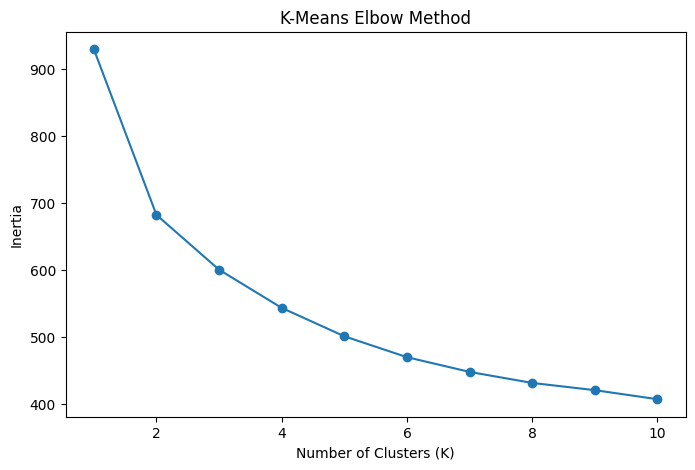

In [4]:
# 3. K-Means Clustering - Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("K-Means Elbow Method")
plt.show()


In [5]:
# 4. Apply K-Means with K=2 
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

print("Adjusted Rand Index (KMeans vs Actual):", adjusted_rand_score(y, clusters_kmeans))


Adjusted Rand Index (KMeans vs Actual): 0.30857844323581785


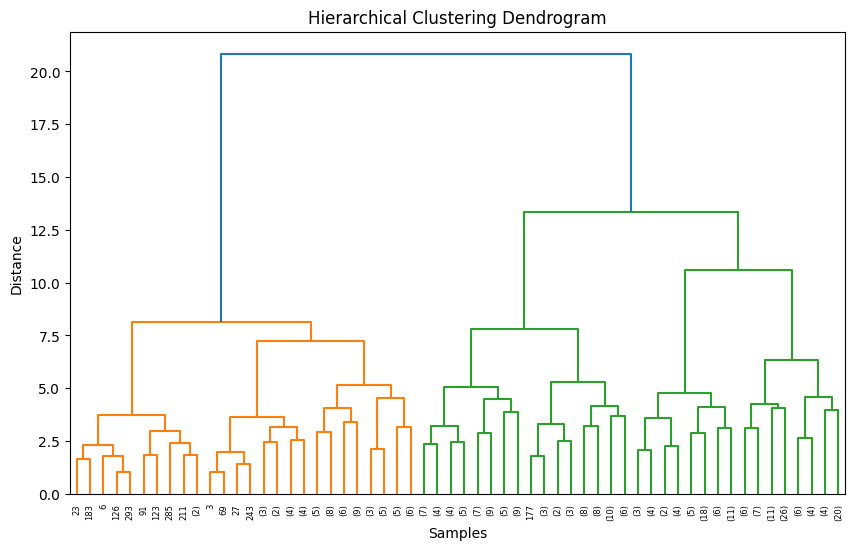

In [6]:
# 5. Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(X, method="ward")
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [7]:
# 6. Cut Dendrogram into 2 Clusters
clusters_hc = fcluster(linked, 2, criterion="maxclust")
print("Adjusted Rand Index (Hierarchical vs Actual):", adjusted_rand_score(y, clusters_hc))


Adjusted Rand Index (Hierarchical vs Actual): 0.16127691572541605


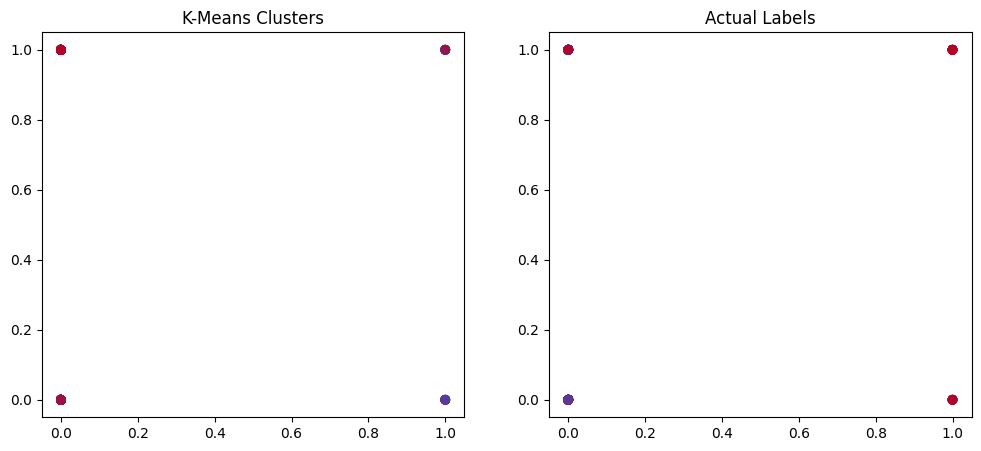

In [8]:
# 7. Compare Clusters with Actual Labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_kmeans, cmap="coolwarm", alpha=0.7)
plt.title("K-Means Clusters")

plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("Actual Labels")

plt.show()
